In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer

from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor



In [17]:
# !pip install ydata-profiling

#Ydata Profiling(Auto EDA)


In [18]:

df=pd.read_csv('bangladesh_student_performance.csv')

In [19]:
df

,date,gender,age,address,famsize,Pstatus,M_Edu,F_Edu,M_Job,F_Job,relationship,smoker,tuition_fee,time_friends,ssc_result,hsc_result
0,29/04/2018,M,18,Rural,GT3,Together,3,2,At_home,Farmer,No,No,71672,4,4.22,3.72
1,29/04/2018,F,19,Rural,LE3,Apart,0,4,Other,Health,Yes,No,26085,5,3.47,2.62
2,29/04/2018,F,19,Rural,GT3,Together,0,3,Teacher,Services,No,No,40891,3,3.32,2.56
3,29/04/2018,F,19,Rural,LE3,Apart,2,3,At_home,Business,No,No,50600,2,4.57,4.17
4,29/04/2018,M,17,Rural,GT3,Together,1,1,At_home,Farmer,No,No,62458,2,4.50,3.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,29/04/2018,M,18,Urban,GT3,Together,2,2,Teacher,Health,No,No,108426,2,3.57,3.18
2014,29/04/2018,M,19,Urban,GT3,Together,0,3,Other,Teacher,Yes,No,100665,5,4.05,3.13
2015,29/04/2018,M,18,Urban,GT3,Together,3,2,Services,Farmer,Yes,No,92291,1,3.93,3.15
2016,29/04/2018,M,19,Rural,GT3,Together,0,2,At_home,Teacher,No,No,43926,3,3.34,2.83


In [20]:
# from ydata_profiling import ProfileReport
# profile=ProfileReport(df,title='Auto EDA Profiling Report')
# profile.to_file("report.html")

In [21]:
df.columns

Index(['date', 'gender', 'age', 'address', 'famsize', 'Pstatus', 'M_Edu',
       'F_Edu', 'M_Job', 'F_Job', 'relationship', 'smoker', 'tuition_fee',
       'time_friends', 'ssc_result', 'hsc_result'],
      dtype='str')

In [22]:
!git init


Reinitialized existing Git repository in E:/AI & ML/phitron/ML_project_1/.git/


In [23]:
df

,date,gender,age,address,famsize,Pstatus,M_Edu,F_Edu,M_Job,F_Job,relationship,smoker,tuition_fee,time_friends,ssc_result,hsc_result
0,29/04/2018,M,18,Rural,GT3,Together,3,2,At_home,Farmer,No,No,71672,4,4.22,3.72
1,29/04/2018,F,19,Rural,LE3,Apart,0,4,Other,Health,Yes,No,26085,5,3.47,2.62
2,29/04/2018,F,19,Rural,GT3,Together,0,3,Teacher,Services,No,No,40891,3,3.32,2.56
3,29/04/2018,F,19,Rural,LE3,Apart,2,3,At_home,Business,No,No,50600,2,4.57,4.17
4,29/04/2018,M,17,Rural,GT3,Together,1,1,At_home,Farmer,No,No,62458,2,4.50,3.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,29/04/2018,M,18,Urban,GT3,Together,2,2,Teacher,Health,No,No,108426,2,3.57,3.18
2014,29/04/2018,M,19,Urban,GT3,Together,0,3,Other,Teacher,Yes,No,100665,5,4.05,3.13
2015,29/04/2018,M,18,Urban,GT3,Together,3,2,Services,Farmer,Yes,No,92291,1,3.93,3.15
2016,29/04/2018,M,19,Rural,GT3,Together,0,2,At_home,Teacher,No,No,43926,3,3.34,2.83


In [24]:
df.drop('date',axis=1,inplace=True)
df

,gender,age,address,famsize,Pstatus,M_Edu,F_Edu,M_Job,F_Job,relationship,smoker,tuition_fee,time_friends,ssc_result,hsc_result
0,M,18,Rural,GT3,Together,3,2,At_home,Farmer,No,No,71672,4,4.22,3.72
1,F,19,Rural,LE3,Apart,0,4,Other,Health,Yes,No,26085,5,3.47,2.62
2,F,19,Rural,GT3,Together,0,3,Teacher,Services,No,No,40891,3,3.32,2.56
3,F,19,Rural,LE3,Apart,2,3,At_home,Business,No,No,50600,2,4.57,4.17
4,M,17,Rural,GT3,Together,1,1,At_home,Farmer,No,No,62458,2,4.50,3.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,M,18,Urban,GT3,Together,2,2,Teacher,Health,No,No,108426,2,3.57,3.18
2014,M,19,Urban,GT3,Together,0,3,Other,Teacher,Yes,No,100665,5,4.05,3.13
2015,M,18,Urban,GT3,Together,3,2,Services,Farmer,Yes,No,92291,1,3.93,3.15
2016,M,19,Rural,GT3,Together,0,2,At_home,Teacher,No,No,43926,3,3.34,2.83


In [25]:
cor=df.select_dtypes(include=np.number).corr()['hsc_result'].sort_values(ascending=False)
cor

hsc_result      1.000000
ssc_result      0.950178
M_Edu           0.063776
F_Edu           0.054811
tuition_fee     0.038068
age            -0.009857
time_friends   -0.156356
Name: hsc_result, dtype: float64

In [26]:
df.drop('age',axis=1,inplace=True)
df

,gender,address,famsize,Pstatus,M_Edu,F_Edu,M_Job,F_Job,relationship,smoker,tuition_fee,time_friends,ssc_result,hsc_result
0,M,Rural,GT3,Together,3,2,At_home,Farmer,No,No,71672,4,4.22,3.72
1,F,Rural,LE3,Apart,0,4,Other,Health,Yes,No,26085,5,3.47,2.62
2,F,Rural,GT3,Together,0,3,Teacher,Services,No,No,40891,3,3.32,2.56
3,F,Rural,LE3,Apart,2,3,At_home,Business,No,No,50600,2,4.57,4.17
4,M,Rural,GT3,Together,1,1,At_home,Farmer,No,No,62458,2,4.50,3.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,M,Urban,GT3,Together,2,2,Teacher,Health,No,No,108426,2,3.57,3.18
2014,M,Urban,GT3,Together,0,3,Other,Teacher,Yes,No,100665,5,4.05,3.13
2015,M,Urban,GT3,Together,3,2,Services,Farmer,Yes,No,92291,1,3.93,3.15
2016,M,Rural,GT3,Together,0,2,At_home,Teacher,No,No,43926,3,3.34,2.83


In [27]:
df.shape

(2018, 14)

In [28]:
df.isnull().sum().sum()

np.int64(0)

In [29]:
df.describe()

,M_Edu,F_Edu,tuition_fee,time_friends,ssc_result,hsc_result
count,2018.000000,2018.000000,2018.000000,2018.00000,2018.000000,2018.000000
mean,1.871160,2.174430,72977.637760,3.05996,3.788087,3.199177
std,1.194206,1.252979,24045.222595,1.43919,0.622376,0.604526
min,0.000000,0.000000,25102.000000,1.00000,2.000000,2.000000
25%,1.000000,1.000000,53619.500000,2.00000,3.360000,2.780000
50%,2.000000,2.000000,71272.500000,3.00000,3.770000,3.160000
75%,3.000000,3.000000,90904.750000,4.00000,4.230000,3.580000
max,4.000000,4.000000,129168.000000,5.00000,5.000000,5.000000


In [30]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        2018 non-null   str    
 1   address       2018 non-null   str    
 2   famsize       2018 non-null   str    
 3   Pstatus       2018 non-null   str    
 4   M_Edu         2018 non-null   int64  
 5   F_Edu         2018 non-null   int64  
 6   M_Job         2018 non-null   str    
 7   F_Job         2018 non-null   str    
 8   relationship  2018 non-null   str    
 9   smoker        2018 non-null   str    
 10  tuition_fee   2018 non-null   int64  
 11  time_friends  2018 non-null   int64  
 12  ssc_result    2018 non-null   float64
 13  hsc_result    2018 non-null   float64
dtypes: float64(2), int64(4), str(8)
memory usage: 220.8 KB


In [31]:
X=df.drop('hsc_result',axis=1)
y=df['hsc_result']


In [32]:
num_features=X.select_dtypes(include=['int64','float64']).columns
cat_features=X.select_dtypes(include='object').columns

In [33]:
print(num_features)
print(cat_features)

Index(['M_Edu', 'F_Edu', 'tuition_fee', 'time_friends', 'ssc_result'], dtype='str')
Index(['gender', 'address', 'famsize', 'Pstatus', 'M_Job', 'F_Job',
       'relationship', 'smoker'],
      dtype='str')


In [34]:
#Transforming features using pipeline

num_transformer= Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)

cal_transformer= Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('encoder',OneHotEncoder(handle_unknown='ignore'))

    ]

)

In [35]:
#combine the transformations

preprocessor=ColumnTransformer(
    transformers=[
        ('num',num_transformer,num_features),
        ('cal',cal_transformer,cat_features)
    ]
)

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [37]:
# base learner
reg_lr=LinearRegression()
reg_rf=RandomForestRegressor(n_estimators=100, random_state=42)
reg_gbr=GradientBoostingRegressor(n_estimators=100, random_state=42)

# voting regrssor
reg_voting=VotingRegressor(
    estimators=[
        ('lr',reg_lr),
        ('rf',reg_rf),
        ('gbr',reg_gbr)
    ]
)

#stacking regressor
reg_stacking=StackingRegressor(
    estimators=[
        ('rf',reg_rf),
        ('gbr',reg_gbr)
    ],
    final_estimator= Ridge() #the meta learner
)

In [38]:
model_to_train = {
    'Linear Regression' : reg_lr,
    'Random Forest' : reg_rf,
    'Gradient Boosting': reg_gbr,
    'Voting Ensemble ' : reg_voting,
    'Stacking Ensemble ' : reg_stacking

}

In [39]:
results = []
for name,model in model_to_train.items():
    pipe=Pipeline(
        steps=[
            ('preprocessor',preprocessor),
            ('model',model)
        ]
    )
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    r2=r2_score(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    results.append({
        'Model Name' : name,
        'R2 Score' : r2,
        'MAE' : mae
    })
    results_df=pd.DataFrame(results).sort_values(by='R2 Score',ascending=False)


In [40]:
results_df
#stacking ensemble did well in this dataset

,Model Name,R2 Score,MAE
4,Stacking Ensemble,0.958247,0.100717
2,Gradient Boosting,0.958165,0.100721
3,Voting Ensemble,0.957598,0.101160
1,Random Forest,0.951338,0.109031
0,Linear Regression,0.945882,0.113087


In [41]:
final_pipe=Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('model',reg_stacking)
    ]
)

final_pipe.fit(X_train,y_train)
y_pred_final=final_pipe.predict(X_test)

print("accuracy->",r2_score(y_test,y_pred_final))

accuracy-> 0.9582473198821987


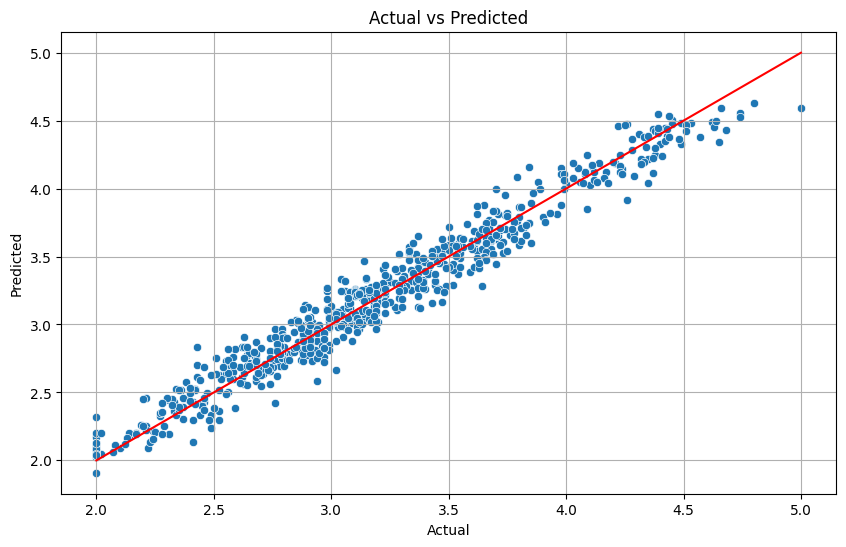

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=y_pred_final)
sns.lineplot(x=y_test,y=y_test,color='red')
plt.grid(True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [43]:

model_gbr=Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('model',GradientBoostingRegressor(
            n_estimators=100,
            max_depth=None,
            min_samples_split=2,
            random_state=42
        ))
    ]
)
model_gbr.fit(X_train,y_train)
y_pred_gbr=model_gbr.predict(X_test)
print("accuracy->",r2_score(y_test,y_pred_gbr))



accuracy-> 0.9030195180800163


In [45]:
#Grid search CV

param_grid = {
    'model__n_estimators': [50, 100,150,200],
    'model__max_depth': [None, 10, 20,30],
    'model__min_samples_split': [2,3,5,6],

}

grid_search_gbr = GridSearchCV(
    estimator=model_gbr,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

grid_search_gbr.fit(X_train, y_train)
print("best params-> ",grid_search_gbr.best_params_)
print("best score-> ",grid_search_gbr.best_score_)



Fitting 5 folds for each of 64 candidates, totalling 320 fits


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [46]:
gbr_pipe=Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('model',GradientBoostingRegressor(
            n_estimators=100,
            max_depth=10,
            min_samples_split=6,
            random_state=42,
            verbose=2
        ))
    ]
)

gbr_pipe.fit(X_train,y_train)
y_pred_gbr=gbr_pipe.predict(X_test)
print("accuracy->",r2_score(y_test,y_pred_gbr))

      Iter       Train Loss   Remaining Time 
         1           0.2903            0.80s
         2           0.2361            0.80s
         3           0.1921            0.77s
         4           0.1563            0.78s
         5           0.1273            0.75s
         6           0.1037            0.74s
         7           0.0844            0.72s
         8           0.0689            0.71s
         9           0.0562            0.71s
        10           0.0459            0.70s
        11           0.0375            0.69s
        12           0.0307            0.68s
        13           0.0252            0.67s
        14           0.0206            0.66s
        15           0.0169            0.66s
        16           0.0139            0.65s
        17           0.0115            0.64s
        18           0.0095            0.63s
        19           0.0078            0.64s
        20           0.0065            0.63s
        21           0.0053            0.63s
        2

In [47]:
#model saving

import pickle

with open("gbr_mode.pkl","wb") as f:
    pickle.dump(gbr_pipe,f)



In [ ]:
#load model

with open("gbr_mode.pkl","rb") as f:
    ready_model=pickle.load(f)

ready_model.predict(X_test)

array([3.25924321, 3.49552634, 3.62679962, 3.8406736 , 4.0875284 ,
       3.27799024, 4.10184888, 2.17608366, 2.02964544, 3.3259591 ,
       3.64317679, 2.90697907, 3.2044052 , 4.51286046, 2.99546763,
       2.65334693, 3.6210635 , 3.29398602, 2.86462555, 2.80794404,
       2.82502489, 3.26395289, 2.87044818, 3.1052991 , 2.08022457,
       2.68735607, 3.28688827, 3.98450076, 3.1935679 , 4.05903316,
       2.46065954, 3.88126993, 4.44001144, 2.5388377 , 3.16854658,
       3.2254759 , 2.71301209, 3.51261825, 2.47347376, 2.64528268,
       2.9610882 , 2.93084864, 3.63657654, 2.82251163, 2.2424534 ,
       2.97682776, 2.65074983, 2.71522954, 4.32801892, 3.17787024,
       2.92977479, 3.3859551 , 4.31312175, 3.53616557, 2.98458274,
       3.230985  , 3.26711508, 2.87022768, 3.69859623, 2.94426844,
       3.12133629, 2.70984519, 2.41981923, 4.55522397, 2.59970535,
       3.27093107, 3.80065364, 2.76343475, 3.02803009, 3.37277505,
       2.96833269, 2.63491659, 2.63893889, 3.54915192, 3.12494

: 